Original edges: 668
Graph has 134 nodes and 668 edges.
Top 10 influential people in the friendship network:
       n         i         b         c       inf
95   691  0.866667  1.000000  0.967172  0.936818
3    272  1.000000  0.558159  0.969620  0.858334
47   883  0.800000  0.430042  1.000000  0.749013
2    205  0.733333  0.515620  0.969620  0.738905
10   407  0.800000  0.486645  0.888631  0.732583
41   117  0.733333  0.539682  0.839912  0.707212
106  245  0.600000  0.511774  0.860674  0.651735
20   441  0.533333  0.408489  0.880460  0.600018
8     28  0.666667  0.260401  0.808017  0.587192
49   125  0.466667  0.534978  0.753937  0.573341


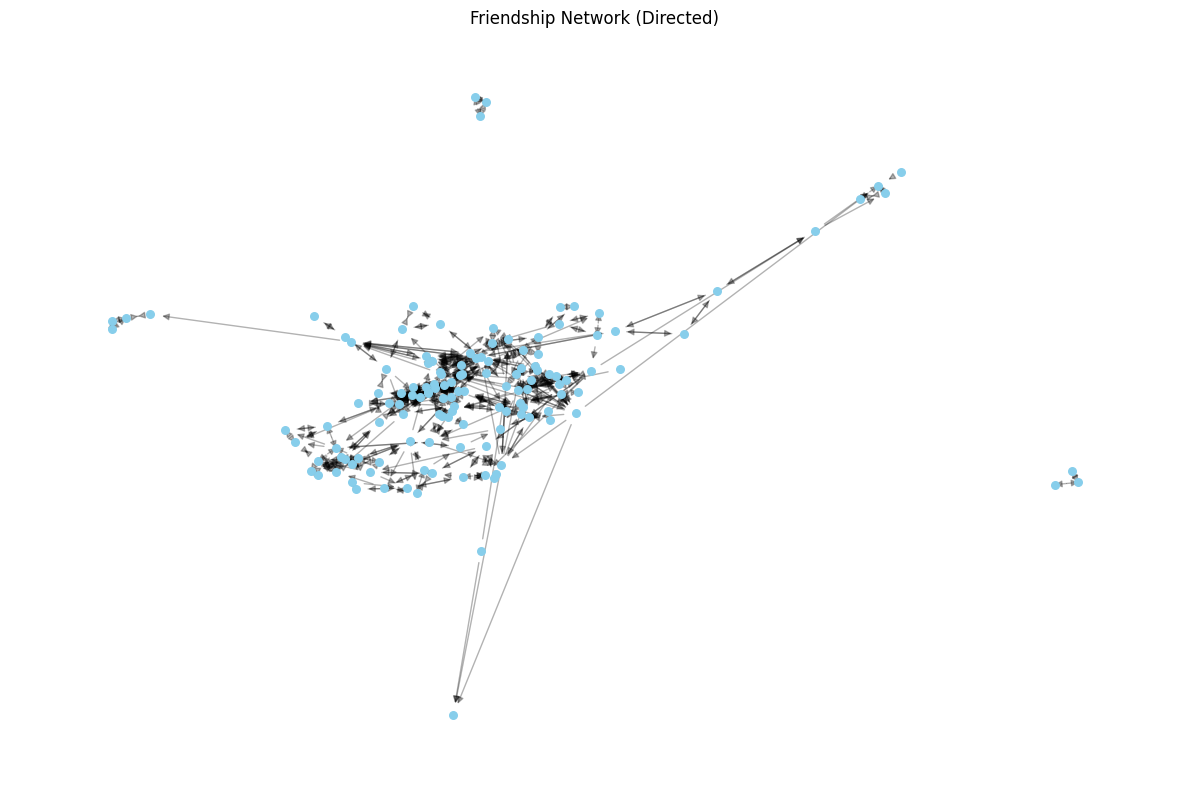

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/Friendship-network_data_2013.csv', sep=r'\s+', header=None, names=['s', 't'])
df.dropna(inplace=True)
df = df.astype(int)
print(f"Original edges: {len(df)}")

g = nx.DiGraph()
g.add_edges_from(df.values)
print(f"Graph has {g.number_of_nodes()} nodes and {g.number_of_edges()} edges.")

idg = dict(g.in_degree())
btw = nx.betweenness_centrality(g, normalized=True)
cls = nx.closeness_centrality(g)

d = pd.DataFrame({
    'n': list(g.nodes()),
    'i': [idg[x] for x in g.nodes()],
    'b': [btw[x] for x in g.nodes()],
    'c': [cls[x] for x in g.nodes()]
})

s = MinMaxScaler()
d[['i', 'b', 'c']] = s.fit_transform(d[['i', 'b', 'c']])

d['inf'] = 0.4 * d['i'] + 0.3 * d['b'] + 0.3 * d['c']
top = d.sort_values(by='inf', ascending=False).head(10)
print("Top 10 influential people in the friendship network:")
print(top[['n', 'i', 'b', 'c', 'inf']])

plt.figure(figsize=(12, 8))
p = nx.spring_layout(g, seed=42)
nx.draw_networkx_nodes(g, p, node_size=30, node_color='skyblue')
nx.draw_networkx_edges(g, p, alpha=0.3, arrows=True)
plt.title("Friendship Network (Directed)")
plt.axis('off')
plt.tight_layout()
plt.show()


Filtered Facebook links: 1437 edges
Approximate unique nodes: 284

Facebook Graph: 156 nodes, 1437 edges
Largest Connected Component: 156 nodes, 1437 edges

Top 10 Influencers in Friendship Network:
       n         d         b         c       inf
95   691  0.846154  1.000000  0.967172  0.937775
3    272  0.961538  0.558159  0.969620  0.829772
41   117  1.000000  0.539682  0.839912  0.793198
47   883  0.923077  0.430042  1.000000  0.784373
2    205  0.846154  0.515620  0.969620  0.777131
10   407  0.923077  0.486645  0.888631  0.766118
106  245  0.576923  0.511774  0.860674  0.649790
49   125  0.576923  0.534978  0.753937  0.621946
62    85  0.423077  0.448068  0.974555  0.615233
20   441  0.538462  0.408489  0.880460  0.609137

Top 10 Influencers in Facebook Network:
        n         d         b         c       inf
30    101  0.875000  1.000000  0.961100  0.945367
14    106  0.895833  0.824558  1.000000  0.906797
20    272  1.000000  0.595933  0.798587  0.798173
105  1218  0.770833  

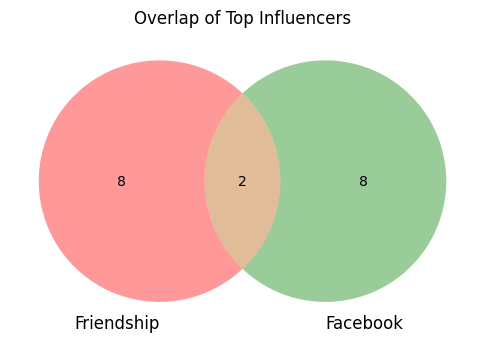

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

p1 = '/content/Friendship-network_data_2013.csv'
p2 = '/content/Facebook-known-pairs_data_2013.csv'

df1 = pd.read_csv(p1, sep=r'\s+', header=None, names=['s', 't'])
df2 = pd.read_csv(p2, sep=r'\s+', header=None, names=['s', 't', 'l'])
df2 = df2[df2['l'] == 1]

print(f"Filtered Facebook links: {len(df2)} edges")
print(f"Approximate unique nodes: {df2['s'].nunique() + df2['t'].nunique()}")

g1 = nx.from_pandas_edgelist(df1, 's', 't', create_using=nx.DiGraph())
g2 = nx.from_pandas_edgelist(df2, 's', 't', create_using=nx.Graph())

def top_inf(g, n=10):
    d = nx.degree_centrality(g)
    b = nx.betweenness_centrality(g)
    c = nx.closeness_centrality(g)
    df = pd.DataFrame({'n': list(g.nodes), 'd': [d[x] for x in g], 'b': [b[x] for x in g], 'c': [c[x] for x in g]})
    s = MinMaxScaler()
    df[['d', 'b', 'c']] = s.fit_transform(df[['d', 'b', 'c']])
    df['inf'] = df[['d', 'b', 'c']].mean(axis=1)
    return df.sort_values('inf', ascending=False).head(n)

c2 = max(nx.connected_components(g2), key=len)
g2s = g2.subgraph(c2).copy()

print(f"\nFacebook Graph: {g2.number_of_nodes()} nodes, {g2.number_of_edges()} edges")
print(f"Largest Connected Component: {g2s.number_of_nodes()} nodes, {g2s.number_of_edges()} edges")

t1 = top_inf(g1)
t2 = top_inf(g2s)

print("\nTop 10 Influencers in Friendship Network:")
print(t1)

print("\nTop 10 Influencers in Facebook Network:")
print(t2)

common = set(t1['n']) & set(t2['n'])
print(f"\nCommon Influencers in Both Networks ({len(common)}): {sorted(common)}")

try:
    from matplotlib_venn import venn2
    plt.figure(figsize=(6, 6))
    venn2([set(t1['n']), set(t2['n'])], set_labels=('Friendship', 'Facebook'))
    plt.title("Overlap of Top Influencers")
    plt.show()
except ImportError:
    print("\nInstall matplotlib-venn for Venn diagram: pip install matplotlib-venn")


 Detected 16 overlapping communities with k=3
Community 1 (size 5): Top nodes [576, 520, 491]
Community 2 (size 3): Top nodes [465, 531, 486]
Community 3 (size 3): Top nodes [27, 173, 63]
Community 4 (size 43): Top nodes [272, 117, 407]
Community 5 (size 15): Top nodes [624, 769, 622]
Community 6 (size 15): Top nodes [151, 691, 866]
Community 7 (size 17): Top nodes [388, 45, 79]
Community 8 (size 4): Top nodes [564, 694, 248]
Community 9 (size 3): Top nodes [1594, 1828, 1519]
Community 10 (size 6): Top nodes [285, 492, 120]
Community 11 (size 8): Top nodes [468, 845, 80]
Community 12 (size 3): Top nodes [312, 275, 612]
Community 13 (size 3): Top nodes [970, 124, 471]
Community 14 (size 5): Top nodes [1519, 1401, 642]
Community 15 (size 3): Top nodes [200, 480, 771]
Community 16 (size 3): Top nodes [867, 222, 343]


<ipython-input-5-a03dab235c09>:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("tab20", len(value_list))


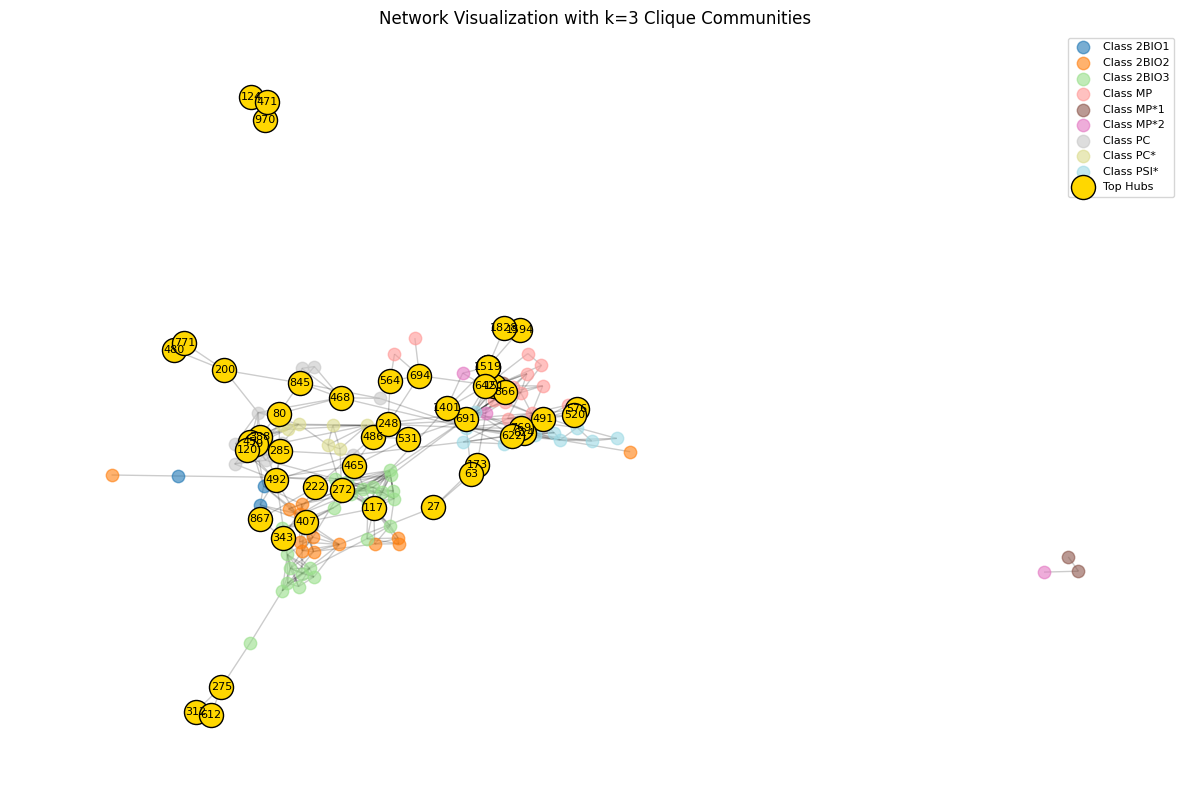

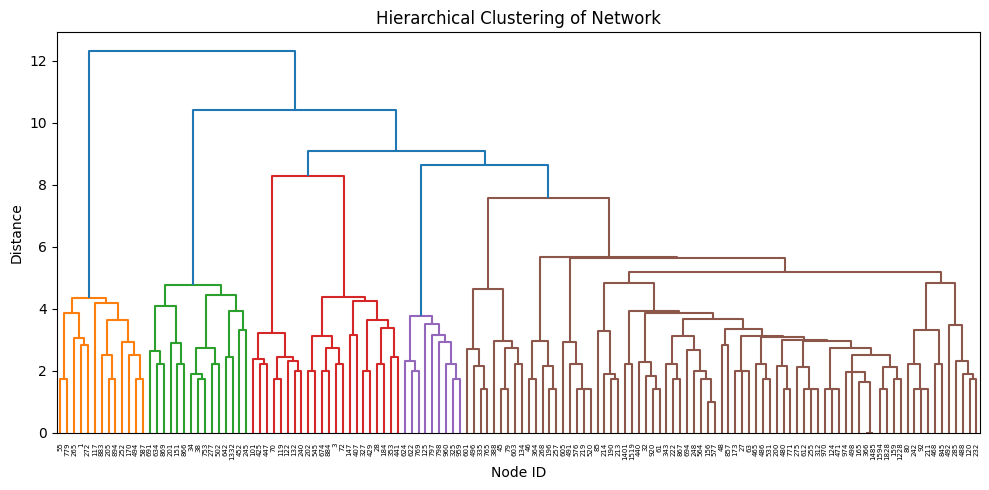


 Top Central Nodes per Class:
Class 2BIO1: [465, 857, 486]
Class 2BIO2: [407, 28, 327]
Class 2BIO3: [883, 272, 205]
Class MP: [151, 201, 691]
Class MP*2: [1519, 1401, 1828]
Class PC: [601, 492, 388]
Class PC*: [85, 214, 603]
Class PSI*: [624, 622, 797]

 Top Central Nodes per Gender:
Gender F: [272, 883, 101]
Gender M: [642, 452, 407]


In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
from networkx.algorithms.community import k_clique_communities
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from collections import defaultdict

#Data loading------------------
friendship_path = "/content/Friendship-network_data_2013.csv"
df_edges = pd.read_csv(friendship_path, sep=r"\s+", header=None, names=["Source", "Target"])
G = nx.from_pandas_edgelist(df_edges, "Source", "Target", create_using=nx.Graph())

metadata_path = "/content/mt actual.txt"
df_meta = pd.read_csv(metadata_path, sep='\t', header=None, names=["ID", "Class", "Gender"])
meta_lookup = df_meta.set_index("ID").to_dict(orient="index")


#k-Clique Community Detection---------------------------------
k = 3
clique_communities = list(k_clique_communities(G, k))
print(f" Detected {len(clique_communities)} overlapping communities with k={k}")

node_to_comms = defaultdict(list)
for idx, comm in enumerate(clique_communities):
    for node in comm:
        node_to_comms[node].append(idx)

#Top central nodes
def top_central_nodes(nodes, graph, top_n=3):
    subG = graph.subgraph(nodes)
    centrality = nx.degree_centrality(subG)
    return sorted(centrality.items(), key=lambda x: -x[1])[:top_n]

top_hubs = {}
for i, community in enumerate(clique_communities):
    hubs = top_central_nodes(community, G)
    top_hubs[i + 1] = [node for node, _ in hubs]
    print(f"Community {i + 1} (size {len(community)}): Top nodes {top_hubs[i + 1]}")




use_metadata = True
color_attribute = "Class"  # Can be changed to "Gender" for differnt metadata analysis
pos = nx.spring_layout(G, seed=42)
highlight_nodes = list(itertools.chain.from_iterable(top_hubs.values()))

plt.figure(figsize=(12, 8))

if use_metadata and color_attribute in ["Class", "Gender"]:
    value_list = sorted(df_meta[color_attribute].dropna().unique())
    val_to_idx = {val: i for i, val in enumerate(value_list)}
    palette = cm.get_cmap("tab20", len(value_list))

    for val in value_list:
        ids = df_meta[df_meta[color_attribute] == val]["ID"]
        present = [n for n in ids if n in G.nodes]
        if present:
            nx.draw_networkx_nodes(G, pos,
                                   nodelist=present,
                                   node_color=[palette(val_to_idx[val])],
                                   label=f"{color_attribute} {val}",
                                   node_size=80,
                                   alpha=0.6)
else:
    palette = cm.get_cmap("tab20", len(clique_communities))
    for i, comm in enumerate(clique_communities):
        nx.draw_networkx_nodes(G, pos,
                               nodelist=list(comm),
                               node_color=[palette(i)],
                               label=f"Community {i+1}",
                               node_size=80,
                               alpha=0.6)
nx.draw_networkx_nodes(G, pos,
                       nodelist=highlight_nodes,
                       node_color='gold',
                       edgecolors='black',
                       node_size=300,
                       label='Top Hubs')

nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, labels={n: str(n) for n in highlight_nodes}, font_size=8)

plt.title(f"Network Visualization with k={k} Clique Communities")
plt.axis("off")
plt.legend(scatterpoints=1, fontsize=8, loc="best")
plt.tight_layout()
plt.show()




#Hierarchical Clustering Dendrogram----------------------
adj_matrix = nx.to_numpy_array(G)
labels = list(G.nodes)
linkage_matrix = linkage(pdist(adj_matrix), method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
plt.title("Hierarchical Clustering of Network")
plt.xlabel("Node ID")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

#Class-wise Influencers---------------------
print("\n Top Central Nodes per Class:")
for cls in sorted(df_meta["Class"].dropna().unique()):
    ids = df_meta[df_meta["Class"] == cls]["ID"]
    subG = G.subgraph([n for n in ids if n in G.nodes])
    if subG.number_of_nodes() > 5:
        deg = nx.degree_centrality(subG)
        top = sorted(deg.items(), key=lambda x: -x[1])[:3]
        print(f"Class {cls}: {[n for n, _ in top]}")

#Gender-wise Influencers-----------------
print("\n Top Central Nodes per Gender:")
for gender in sorted(df_meta["Gender"].dropna().unique()):
    ids = df_meta[df_meta["Gender"] == gender]["ID"]
    subG = G.subgraph([n for n in ids if n in G.nodes])
    if subG.number_of_nodes() > 5:
        deg = nx.degree_centrality(subG)
        top = sorted(deg.items(), key=lambda x: -x[1])[:3]
        print(f"Gender {gender}: {[n for n, _ in top]}")
